In [1]:
# CONFIG CELL
from notebook_utils import set_root_directory

set_root_directory()

In [2]:
import pickle

import matplotlib.figure
import pandas as pd
from statsforecast import StatsForecast
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    root_mean_squared_error,
)

from app import constants
from app.forecaster import Forecaster

In [3]:
INPUT_PATH = "input_files/nearest_imputed_measurements_24h_PM10.parquet"
CONFIG_PICKLE = "input_files/train_subset_config.pickle"
CV_RESULTS = "input_files/cv_results.parquet"
INIT_INPUT_PATH = "input_files/measurements_24h.parquet"
RESULT_PATH = "input_files/nearest_imputed_measurements_24h_PM10_forecast.parquet"

FREQ = "D"
FORECAST_HORIZON = 7
LEVEL = [68]

In [4]:
with open(CONFIG_PICKLE, "rb") as f:
    config = pickle.load(f)

config

{'forecast_horizon': 7,
 'min_date': '2022-01-01',
 'uids': array(['182', '267', '446', '999', '270', '295', '316', '695', '702',
        '744'], dtype=object)}

In [5]:
df = pd.read_parquet(INPUT_PATH)
df = df.rename(columns={constants.PM10: constants.Y})
df[constants.UNIQUE_ID] = df[constants.UNIQUE_ID].astype(str)
df = df.query(f"{constants.UNIQUE_ID} in {list(config[constants.UIDS])}")
df = df.query(f"{constants.TIMESTAMP_COLUMN} >= '{config[constants.MIN_DATE]}'")
display(df.head(5))

max_date = df[constants.TIMESTAMP_COLUMN].max()
print(f"Max date in the dataset: {max_date}")

dates = pd.to_datetime(df[constants.TIMESTAMP_COLUMN], format=constants.CUTOFF_FORMAT).values
train_1 = df.query(f"{constants.TIMESTAMP_COLUMN} < '{dates[-280]}'")
train_2 = df.query(f"{constants.TIMESTAMP_COLUMN} < '{dates[-190]}'")
train_3 = df.query(f"{constants.TIMESTAMP_COLUMN} < '{dates[-110]}'")
train_4 = df.query(f"{constants.TIMESTAMP_COLUMN} < '{dates[-30]}'")

,ds,unique_id,y
1826,2022-01-01,182,8.744970
1827,2022-01-02,182,12.645757
1828,2022-01-03,182,11.684002
1829,2022-01-04,182,11.756574
1830,2022-01-05,182,10.160057


Max date in the dataset: 2023-12-31 00:00:00


In [6]:
display(train_1.tail(5))
display(train_2.tail(5))
display(train_3.tail(5))
display(train_4.tail(5))

,ds,unique_id,y
25275,2023-03-22,744,28.4
25276,2023-03-23,744,18.5
25277,2023-03-24,744,21.4
25278,2023-03-25,744,15.3
25279,2023-03-26,744,8.7


,ds,unique_id,y
25365,2023-06-20,744,22.9
25366,2023-06-21,744,24.5
25367,2023-06-22,744,24.6
25368,2023-06-23,744,30.2
25369,2023-06-24,744,18.7


,ds,unique_id,y
25445,2023-09-08,744,22.4
25446,2023-09-09,744,29.8
25447,2023-09-10,744,28.4
25448,2023-09-11,744,29.1
25449,2023-09-12,744,36.0


,ds,unique_id,y
25525,2023-11-27,744,20.5
25526,2023-11-28,744,25.5
25527,2023-11-29,744,43.8
25528,2023-11-30,744,42.5
25529,2023-12-01,744,70.0


In [7]:
cv_results = pd.read_parquet(CV_RESULTS)
cv_results.tail(10)

,unique_id,start_date,best_model
40,744,2023-03-14,AutoARIMA
41,744,2023-05-26,AutoETS
42,744,2023-08-07,AutoARIMA
43,744,2023-10-19,HistoricAverage
44,744,2023-12-31,AutoARIMA
45,999,2023-03-14,HistoricAverage
46,999,2023-05-26,AutoETS
47,999,2023-08-07,AutoARIMA
48,999,2023-10-19,HistoricAverage
49,999,2023-12-31,AutoARIMA


In [8]:
f = Forecaster(
    cv_results=cv_results,
    freq=FREQ,
    forecast_horizon=FORECAST_HORIZON,
    level=LEVEL,
    n_jobs=-1,
    verbose=True,
)
train_1_results = f.fit_predict(train_1)
train_2_results = f.fit_predict(train_2)
train_3_results = f.fit_predict(train_3)
train_4_results = f.fit_predict(train_4)

c:\Users\Mambo\Desktop\moje_AGH\staszel\daes-project-2425-ispies\app\forecaster.py:81: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  self.cv_results = cv_results.query(


Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\Mambo\Desktop\moje_AGH\staszel\daes-project-2425-ispies\app\forecaster.py:81: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  self.cv_results = cv_results.query(


Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\Mambo\Desktop\moje_AGH\staszel\daes-project-2425-ispies\app\forecaster.py:81: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  self.cv_results = cv_results.query(


Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\Mambo\Desktop\moje_AGH\staszel\daes-project-2425-ispies\app\forecaster.py:81: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  self.cv_results = cv_results.query(


Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
train_4_results.to_parquet(RESULT_PATH, index=False)

In [10]:
init_df = pd.read_parquet(INIT_INPUT_PATH)[[constants.UNIQUE_ID, constants.TIMESTAMP_COLUMN, constants.PM10]]
init_df[constants.UNIQUE_ID] = init_df[constants.UNIQUE_ID].astype(str)
init_df = init_df.rename(columns={constants.PM10: constants.Y})
init_df = init_df.query(f"{constants.UNIQUE_ID} in {list(set(config[constants.UIDS]) - {"446", "702", "270"})}")
init_df = init_df.query(f"{constants.TIMESTAMP_COLUMN} >= '{config[constants.MIN_DATE]}'")

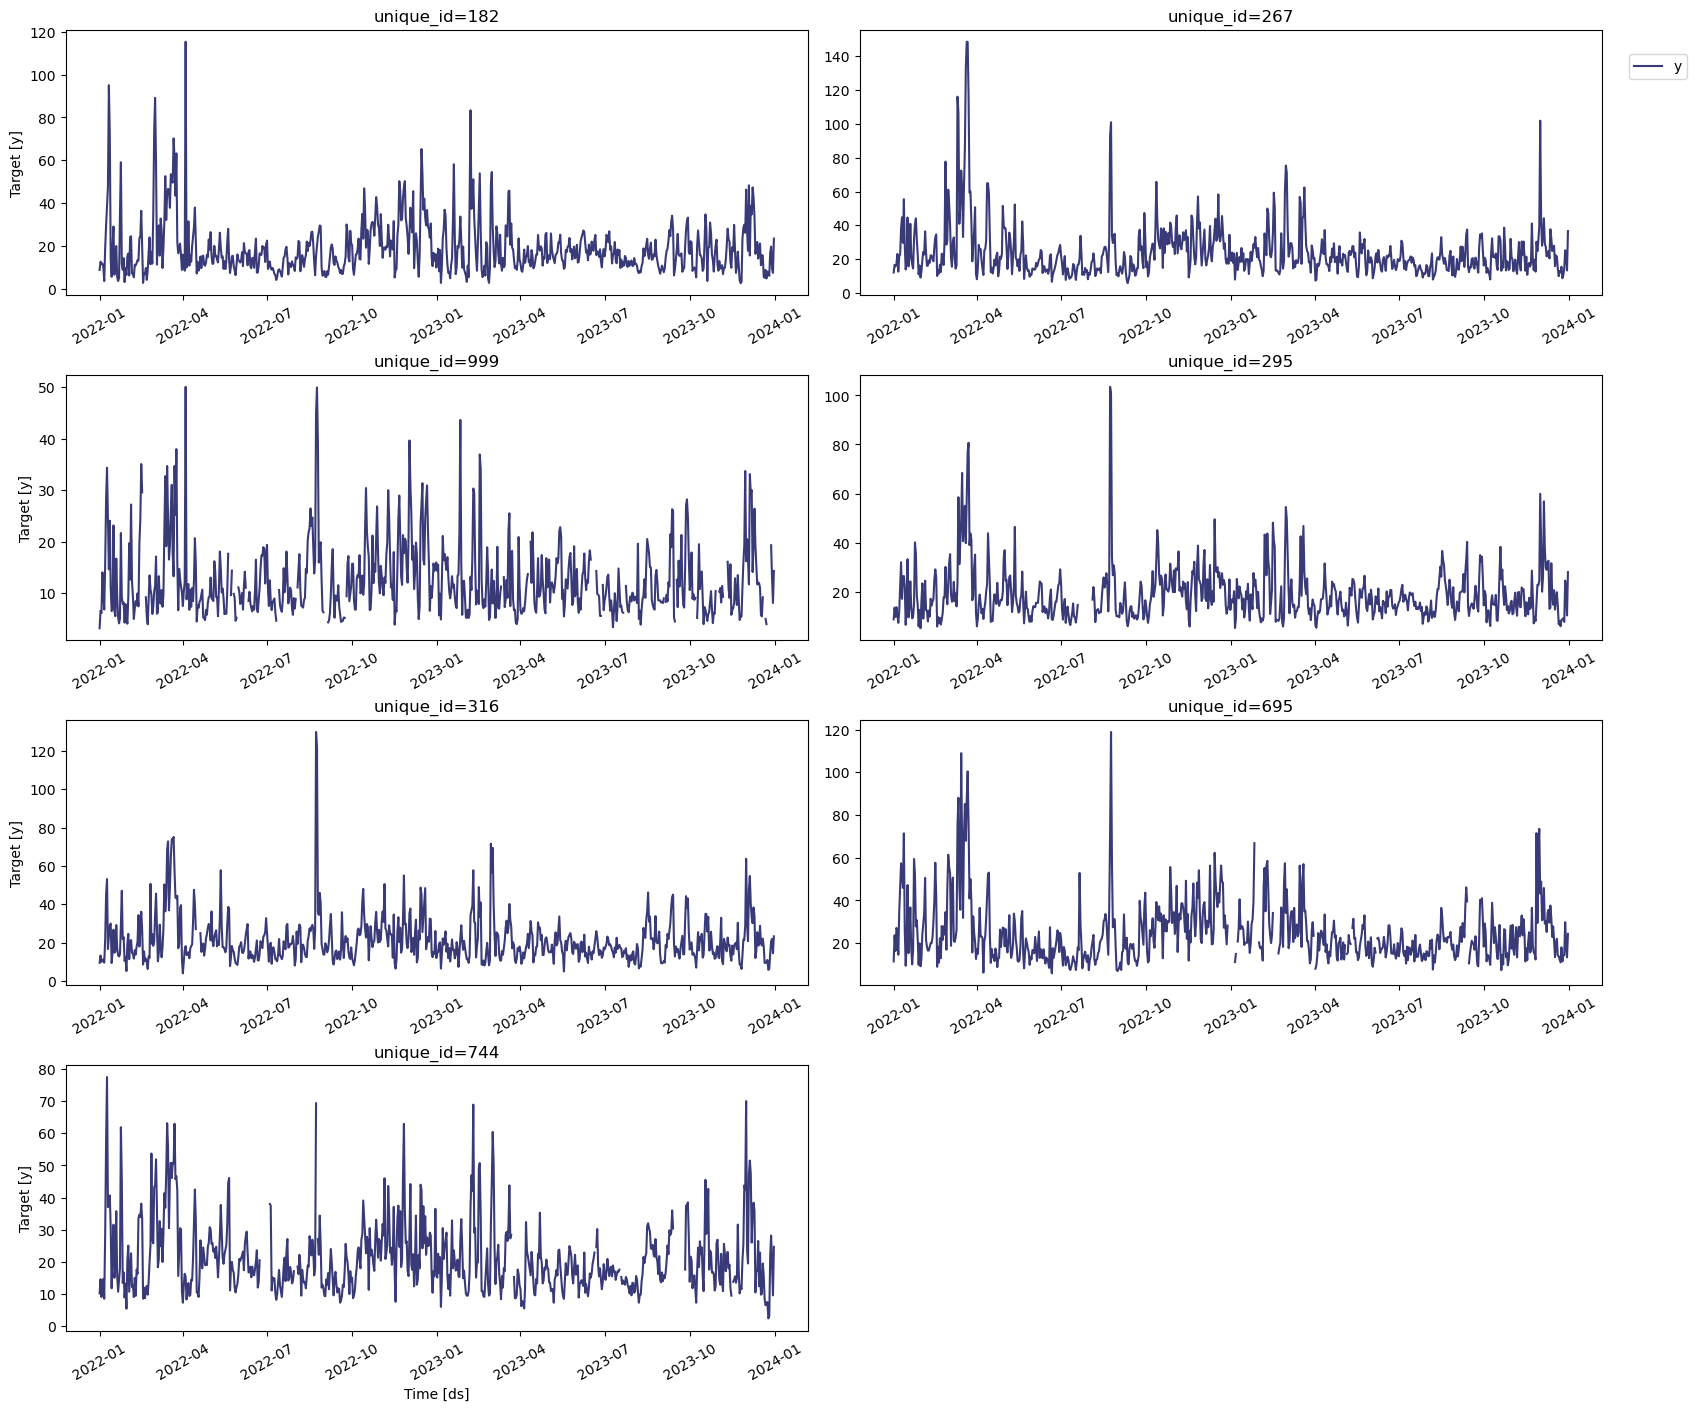

In [11]:
StatsForecast.plot(init_df)

In [12]:
def process_train_df(train: pd.DataFrame, actuals: pd.DataFrame) -> matplotlib.figure.Figure:
    """Process the training DataFrame to create evaluation metrics and plot results."""
    train_results = train.query(f"{constants.UNIQUE_ID} not in ['446', '702', '270']")
    train_actuals = actuals.query(
        f"{constants.TIMESTAMP_COLUMN} <= '{train_results[constants.TIMESTAMP_COLUMN].max()}'"
    )
    train_actuals = train_actuals.groupby(constants.UNIQUE_ID).tail(90)

    train_merged = pd.merge(
        train_results,
        train_actuals,
        on=[constants.UNIQUE_ID, constants.TIMESTAMP_COLUMN],
        how="left",
    )

    print("Missing values in the merged DataFrame:")
    print(train_merged.isna().sum())

    train_merged = train_merged.dropna()
    metrics = (
        train_merged.groupby(constants.UNIQUE_ID)
        .apply(
            lambda x: pd.Series(
                {
                    "MAE": mean_absolute_error(x[constants.PREDICTION], x[constants.Y]),
                    "MAPE": mean_absolute_percentage_error(x[constants.PREDICTION], x[constants.Y]),
                    "RMSE": root_mean_squared_error(x[constants.PREDICTION], x[constants.Y]),
                }
            )
        )
        .reset_index()
        .rename(columns={0: "Metrics"})
    )

    print(metrics)
    plot = StatsForecast.plot(train_actuals, train_results, level=LEVEL)
    return plot

Missing values in the merged DataFrame:
unique_id           0
ds                  0
prediction          0
prediction-lo-68    0
prediction-hi-68    0
y                   1
dtype: int64
  unique_id       MAE      MAPE       RMSE
0       182  8.388375  0.412738   8.843568
1       267  8.130794  0.307482  10.163089
2       295  7.384095  0.372696   8.178092
3       316  3.617576  0.202083   5.244652
4       695  8.062591  0.330872  10.113761
5       744  7.786677  0.393202   8.791092
6       999  6.966733  0.532079   7.381094


C:\Users\Mambo\AppData\Local\Temp\ipykernel_15512\2082848461.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


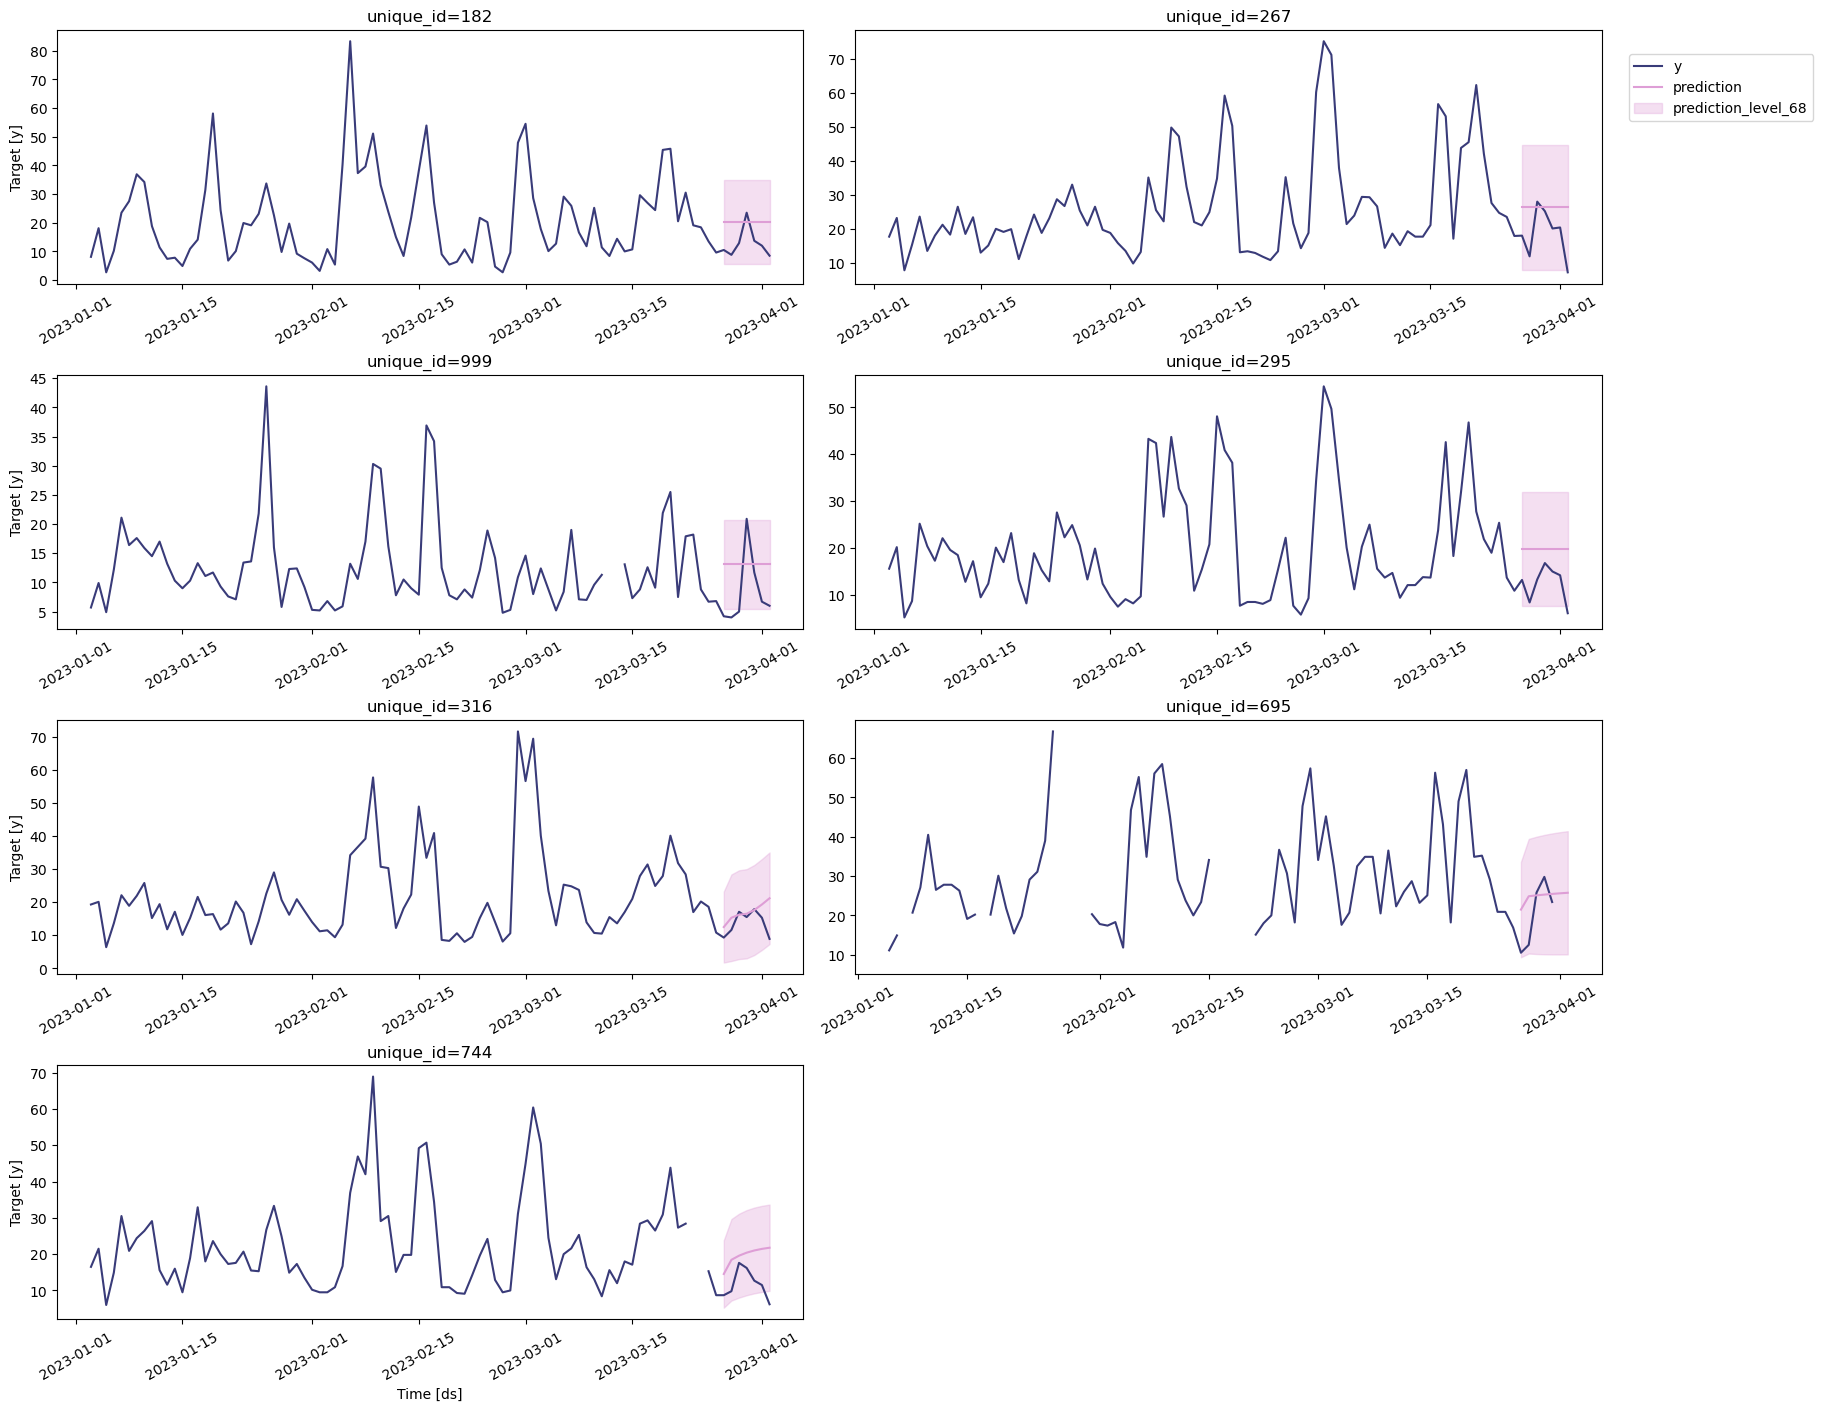

In [13]:
process_train_df(train_1_results, init_df)

Missing values in the merged DataFrame:
unique_id           0
ds                  0
prediction          0
prediction-lo-68    0
prediction-hi-68    0
y                   1
dtype: int64
  unique_id       MAE      MAPE      RMSE
0       182  4.643475  0.235190  5.427352
1       267  8.339735  0.328561  8.662526
2       295  5.594312  0.291891  5.795917
3       316  6.249094  0.296390  6.462210
4       695  6.261808  0.281856  6.846341
5       744  3.545690  0.186092  4.277844
6       999  5.084226  0.391067  5.530890


C:\Users\Mambo\AppData\Local\Temp\ipykernel_15512\2082848461.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


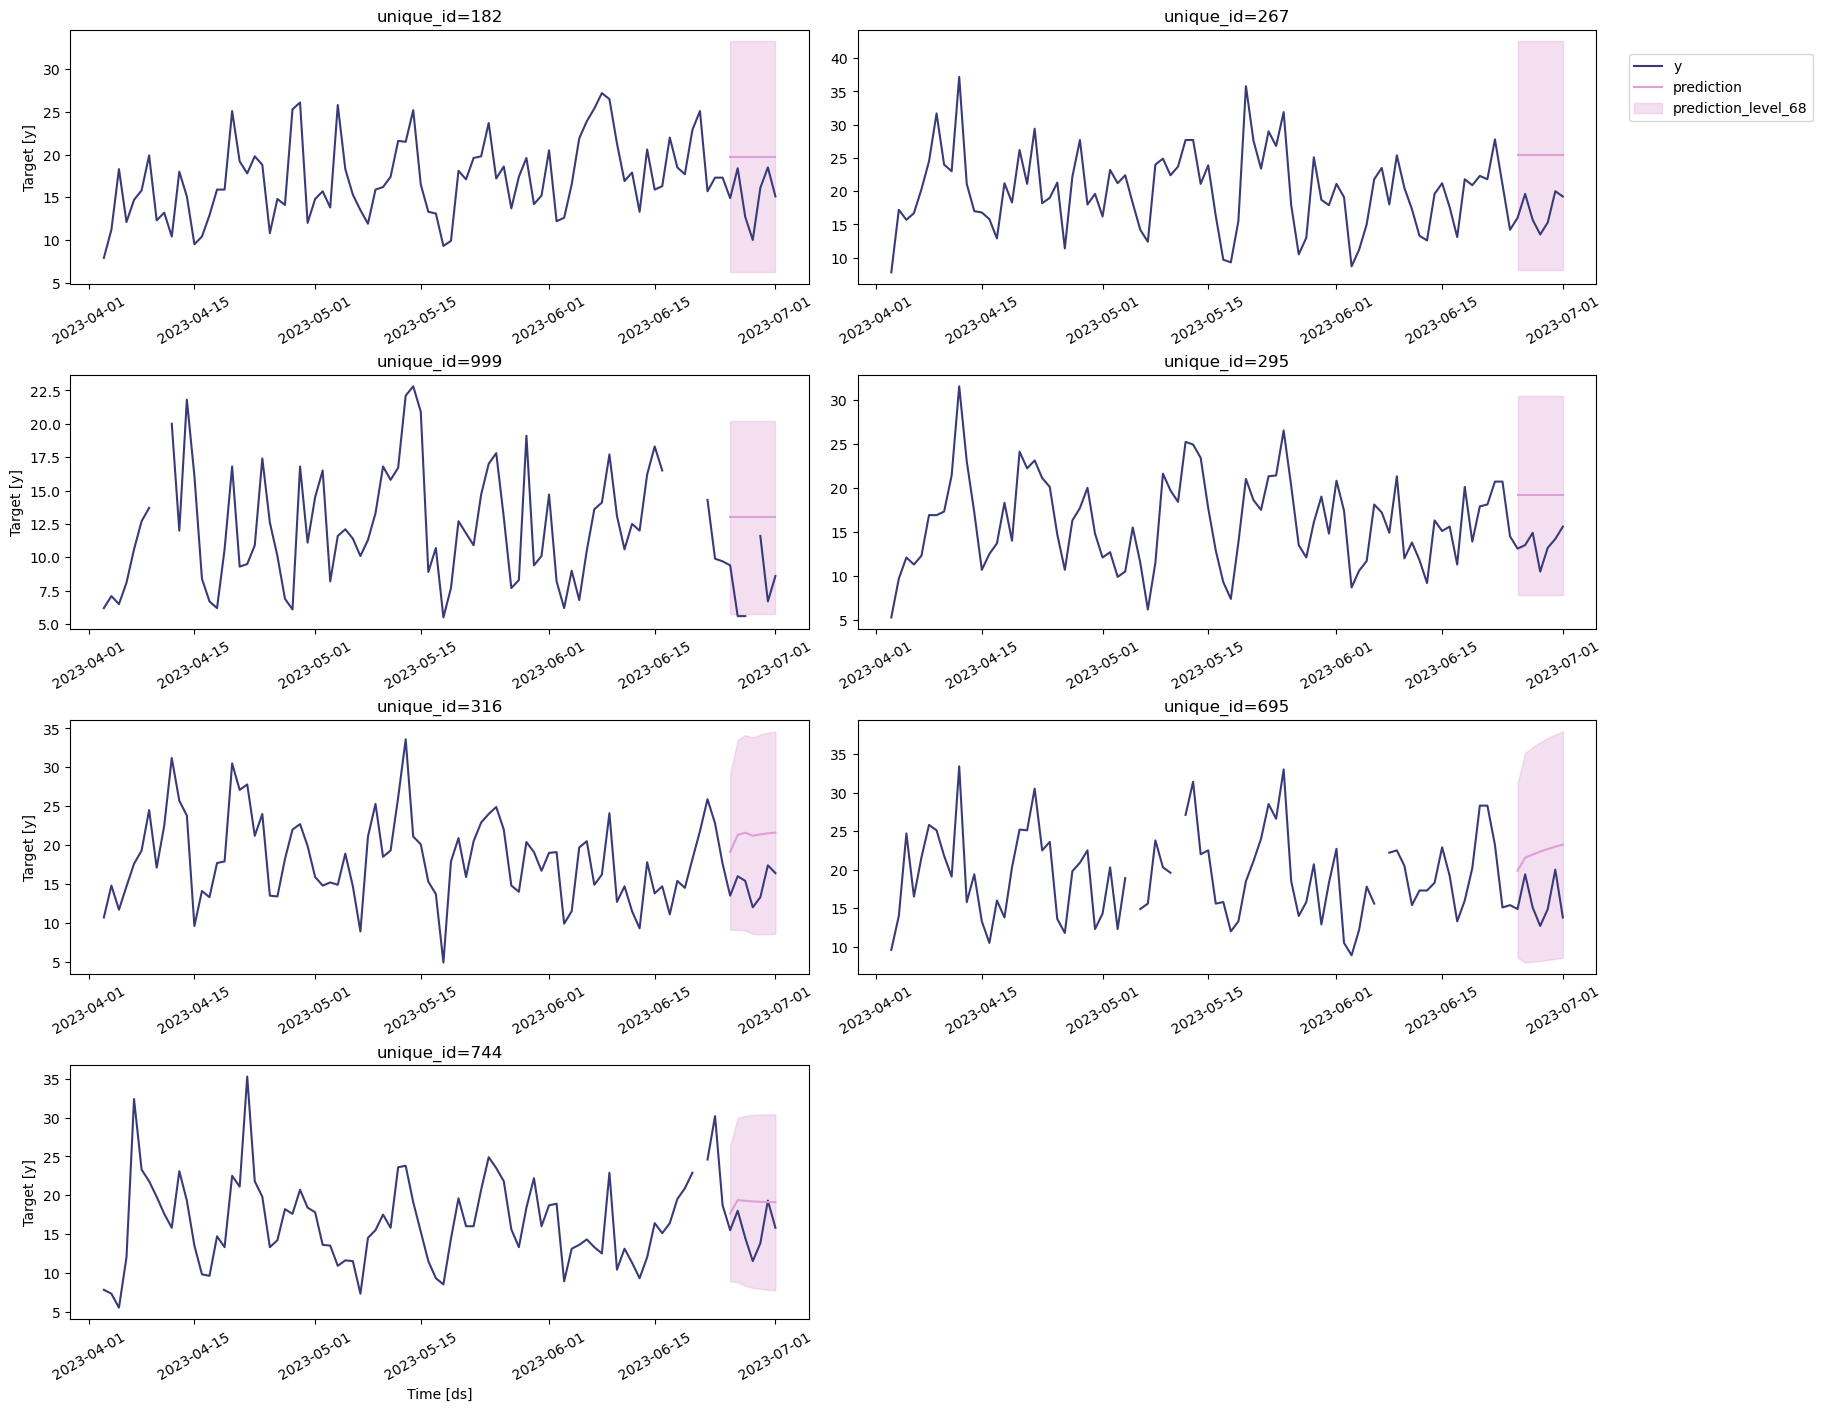

In [14]:
process_train_df(train_2_results, init_df)

Missing values in the merged DataFrame:
unique_id           0
ds                  0
prediction          0
prediction-lo-68    0
prediction-hi-68    0
y                   8
dtype: int64
  unique_id       MAE      MAPE       RMSE
0       182  6.741643  0.351790   7.743978
1       267  8.606682  0.353176   9.210014
2       295  7.701152  0.407434   9.639693
3       316  8.967498  0.342665   9.267037
4       695  8.546837  0.307859  10.084447
5       744  0.449824  0.015019   0.449824
6       999  6.293775  0.498267   7.503418


C:\Users\Mambo\AppData\Local\Temp\ipykernel_15512\2082848461.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


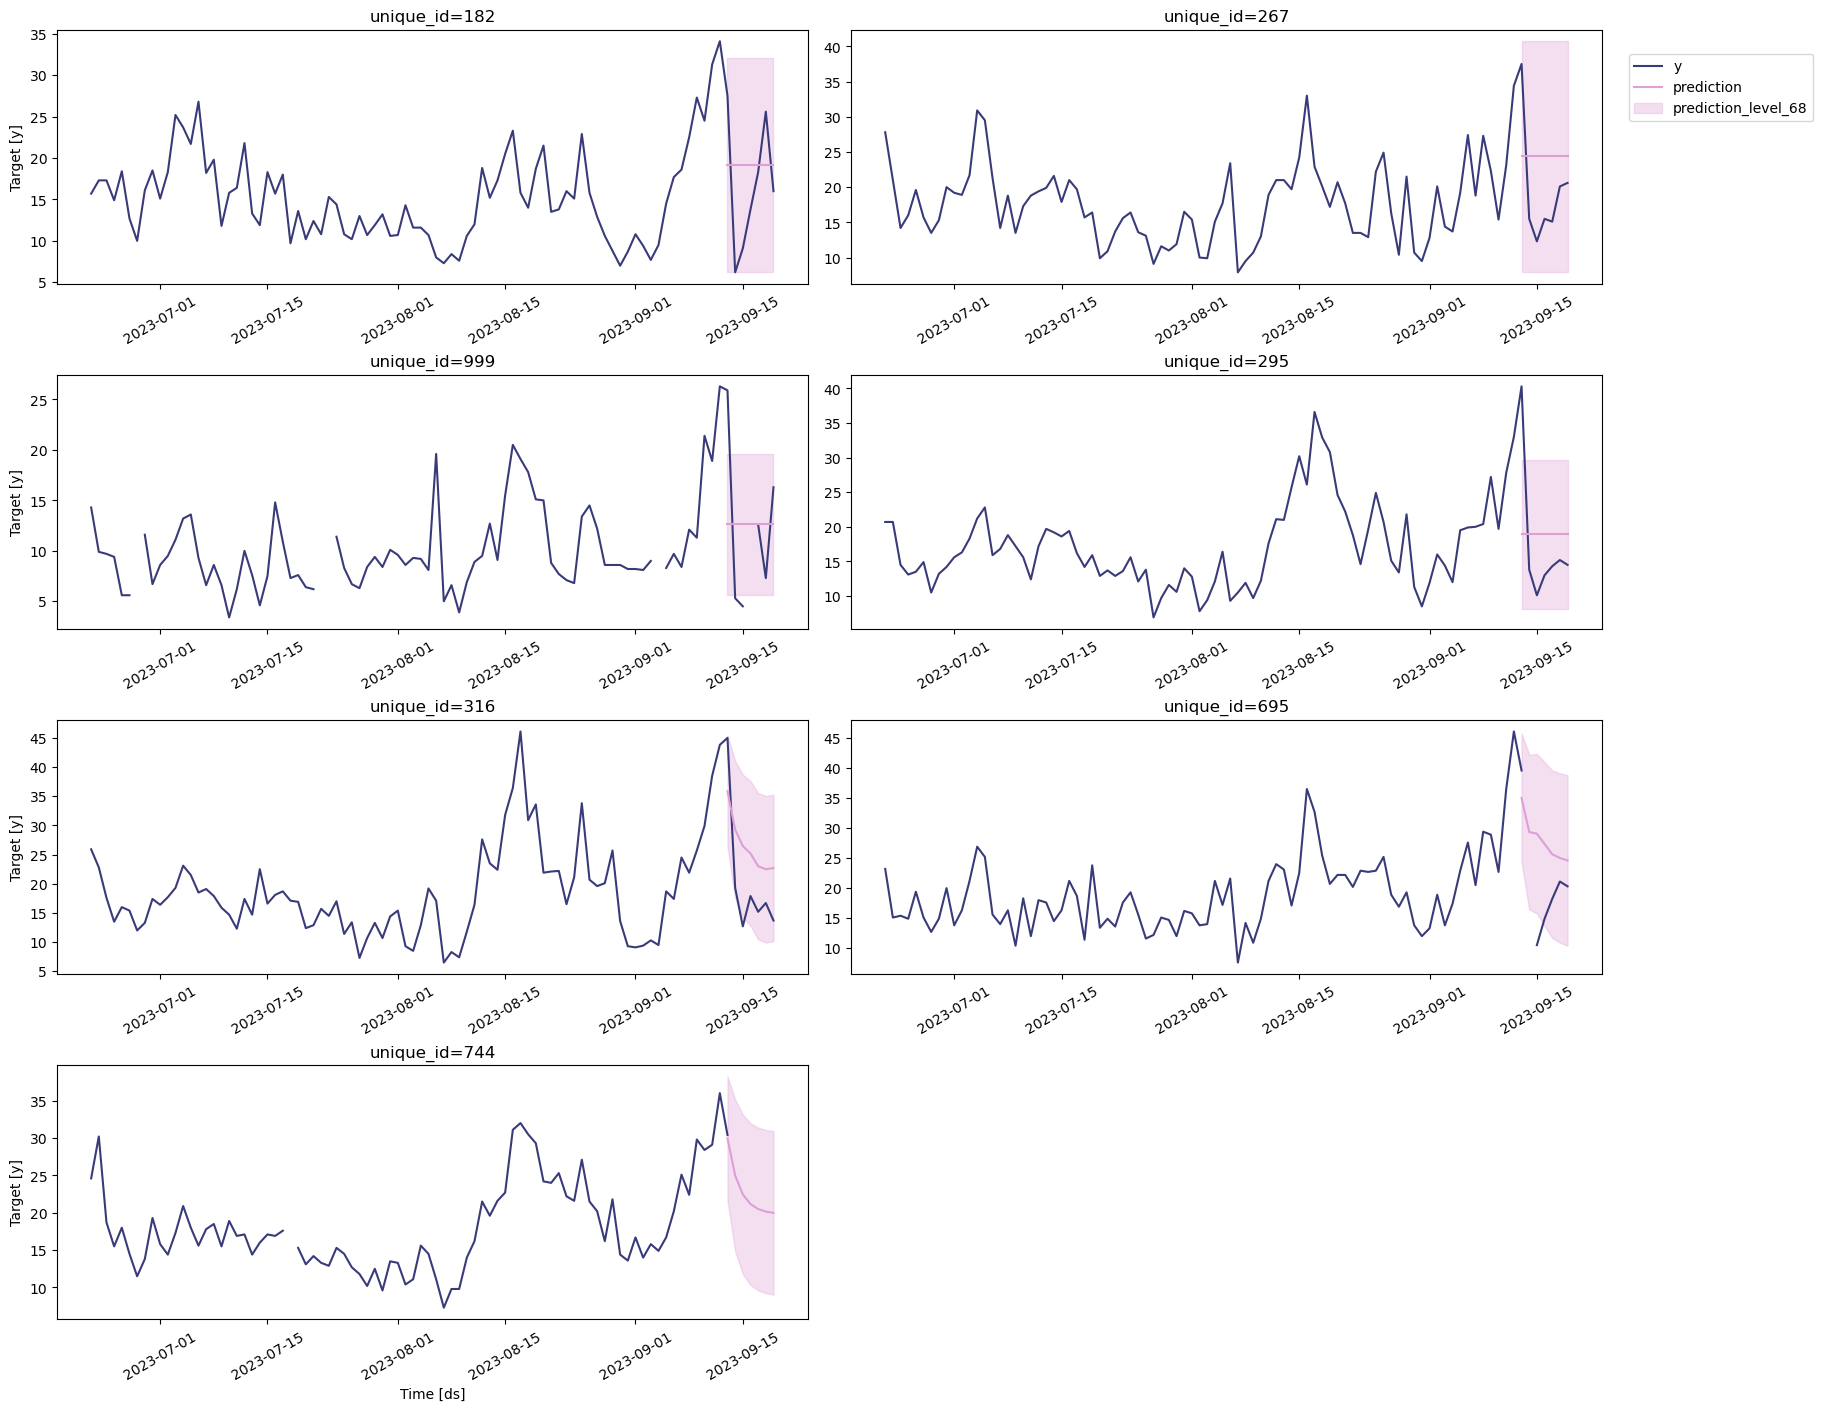

In [15]:
process_train_df(train_3_results, init_df)

Missing values in the merged DataFrame:
unique_id           0
ds                  0
prediction          0
prediction-lo-68    0
prediction-hi-68    0
y                   0
dtype: int64
  unique_id        MAE      MAPE       RMSE
0       182  15.174871  0.803245  18.494783
1       267   9.245714  0.384022  11.778460
2       295  15.422429  0.821947  19.079187
3       316  15.917040  0.518617  17.057980
4       695   6.759745  0.222823   9.712484
5       744  18.044925  0.568229  19.897818
6       999   9.929590  0.793189  12.512944


C:\Users\Mambo\AppData\Local\Temp\ipykernel_15512\2082848461.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


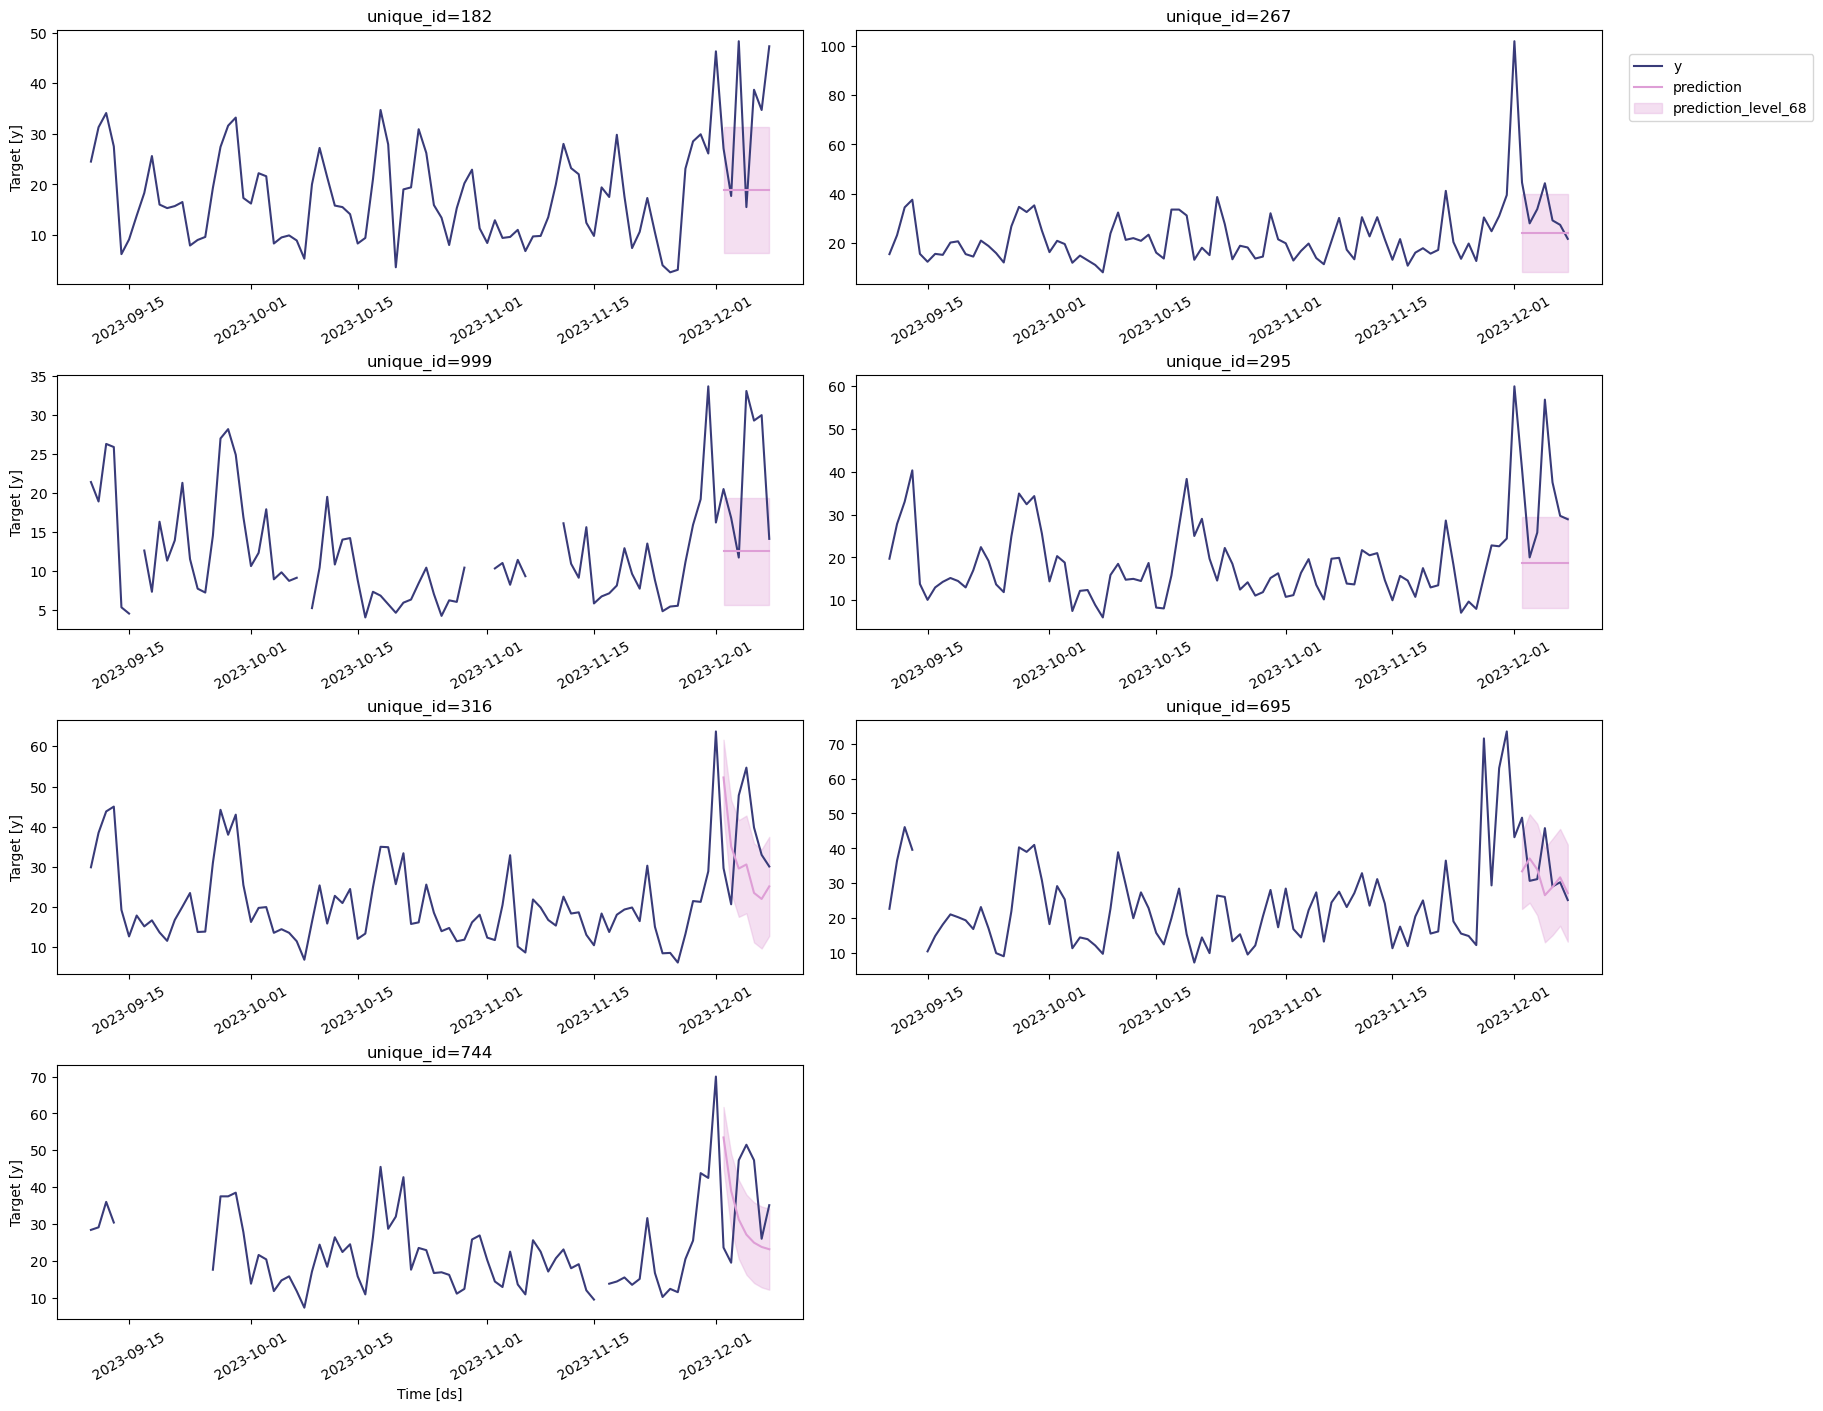

In [16]:
process_train_df(train_4_results, init_df)